length of x: torch.Size([400, 1])
length of y: torch.Size([400, 1])


Text(0, 0.5, 'Dependent variable')

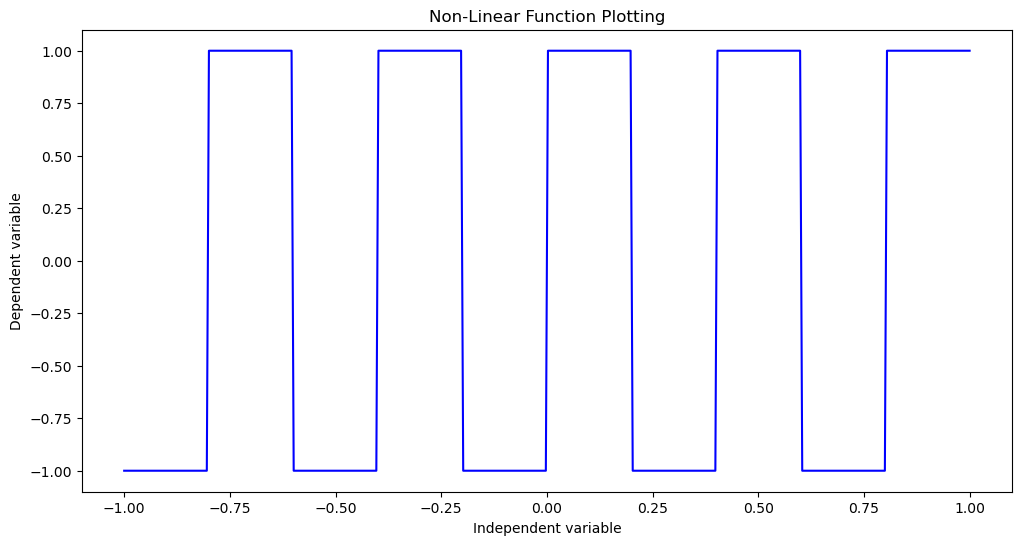

In [17]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
x = torch.unsqueeze(torch.linspace(-1, 1, 400), dim=1)

#choosing sin(x) as a nonliner function
y = (np.sign(np.sin(5*np.pi*x)))

print('length of x:',x.shape)
print('length of y:',y.shape)
plt.figure(figsize=(12,6))
plt.plot(x, y, color = "blue")
plt.title('Non-Linear Function Plotting')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

In [18]:
#Function for model 1
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        # output layer
        self.output = nn.Linear(5, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("Model 1: weight and bias before training\n")

for param in model1.state_dict():
    print(param, "\t",model1.state_dict()[param])

Number of parameters in Model 1: 571
Model 1: weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.2006],
        [ 0.9842],
        [ 0.8863],
        [ 0.6208],
        [-0.5407]])
hiddenlayer1.bias 	 tensor([-0.8827, -0.5109, -0.7787,  0.8630,  0.1602])
hiddenlayer2.weight 	 tensor([[-0.2407,  0.4310,  0.0970, -0.1208,  0.0591],
        [ 0.3832,  0.3235, -0.3082, -0.3349,  0.3788],
        [ 0.0388, -0.1669,  0.0515, -0.1367,  0.2592],
        [ 0.0639, -0.2770,  0.4425,  0.3702,  0.0940],
        [-0.0555,  0.0936, -0.0988, -0.1380,  0.0850],
        [ 0.0063,  0.1983,  0.4211,  0.2168, -0.2615],
        [ 0.4172, -0.3131, -0.0026, -0.3758, -0.3285],
        [ 0.3447,  0.2048, -0.2782,  0.1495,  0.0707],
        [ 0.2732,  0.0994, -0.2486,  0.0569,  0.4067],
        [ 0.1165,  0.0990,  0.0478,  0.0375,  0.0126]])
hiddenlayer2.bias 	 tensor([-0.0010,  0.3546,  0.1192,  0.3079, -0.0418, -0.3847, -0.1350, -0.3036,
         0.2174, -0.2087])
hiddenlayer3.weight 	 tensor(

In [26]:
def testing(model,x,y):
    max_epoch = 20000
    epoch_array = []
    loss_array=[]
    epoch = 0
    not_converged = True
    while not_converged:
        
        # for each x it the modedl predicts
        prediction = model(x)     
        loss = loss_function(prediction, y)
        #clearing gradients for next training, otherwise it provides wrong result
        optimizer.zero_grad()
        # backpropagation for computing gradients
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Reached to Maximum Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [27]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

C:\Users\Jean Michel\AppData\Local\Temp\ipykernel_21776\1534971123.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Jean Michel\AppData\Local\Temp\ipykernel_21776\1534971123.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


epoch: 100, loss = 0.0105
epoch: 200, loss = 0.0102
epoch: 300, loss = 0.0104
epoch: 400, loss = 0.0027
epoch: 500, loss = 0.0020
epoch: 600, loss = 0.0017
epoch: 700, loss = 0.0022
epoch: 800, loss = 0.0025
epoch: 900, loss = 0.0032
epoch: 1000, loss = 0.0320
epoch: 1100, loss = 0.0236
epoch: 1200, loss = 0.0035
epoch: 1300, loss = 0.0033
epoch: 1400, loss = 0.0035
epoch: 1500, loss = 0.0031
epoch: 1600, loss = 0.0032
epoch: 1700, loss = 0.1082
epoch: 1800, loss = 0.0037
epoch: 1900, loss = 0.0031
epoch: 2000, loss = 0.0030
epoch: 2100, loss = 0.0031
epoch: 2200, loss = 0.0062
epoch: 2300, loss = 0.0097
epoch: 2400, loss = 0.0026
epoch: 2500, loss = 0.0027
epoch: 2600, loss = 0.0997
epoch: 2700, loss = 0.0447
epoch: 2800, loss = 0.0044
epoch: 2900, loss = 0.0041
epoch: 3000, loss = 0.0044
epoch: 3100, loss = 0.0042
epoch: 3200, loss = 0.0045
epoch: 3300, loss = 0.0037
epoch: 3400, loss = 0.0167
epoch: 3500, loss = 0.0039
epoch: 3600, loss = 0.0035
epoch: 3700, loss = 0.0032
epoch: 380

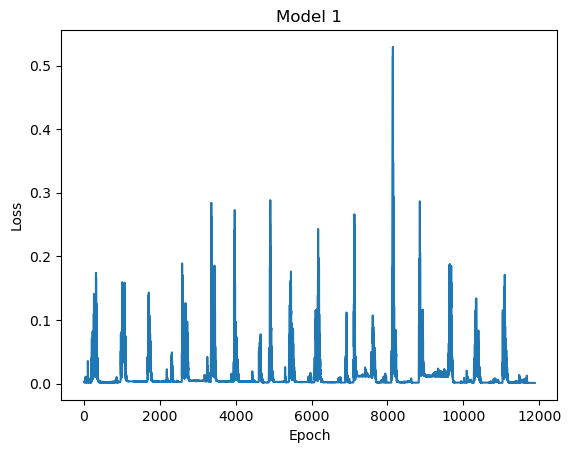

In [28]:
plt.plot(Model1epoch_array, Model1loss_array)
plt.title('Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

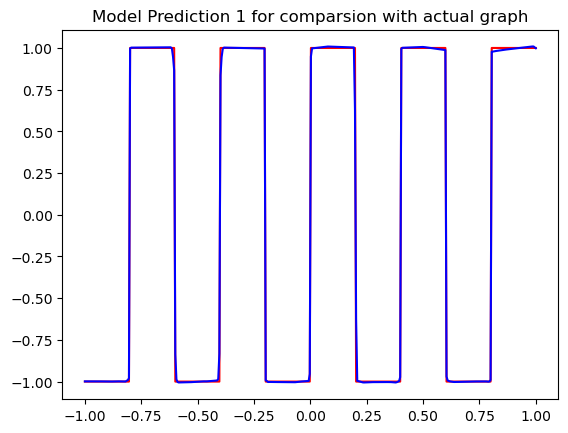

In [29]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [30]:
#Function for model 2
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

#defining the model
model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)

#Getting weights & bias
print("Model 2: weight and bias before training")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572
Model 2: weight and bias before training
hiddenlayer1.weight 	 tensor([[-0.0773],
        [-0.7715],
        [-0.3491],
        [ 0.7936],
        [-0.1401],
        [ 0.8172],
        [-0.8021],
        [ 0.0813],
        [-0.1237],
        [ 0.6541]])
hiddenlayer1.bias 	 tensor([ 0.0878,  0.6318, -0.8781, -0.9994,  0.0413, -0.7843, -0.5023, -0.8136,
        -0.4170, -0.8023])
hiddenlayer2.weight 	 tensor([[-0.3008,  0.3063,  0.1497, -0.1525,  0.1558,  0.1492, -0.0027, -0.3044,
          0.1813, -0.0032],
        [-0.1672,  0.1240,  0.2730,  0.0102, -0.0223,  0.1675, -0.1749,  0.3154,
         -0.3097, -0.2516],
        [ 0.1990,  0.1766,  0.0953, -0.0222, -0.0298,  0.0607,  0.3007,  0.0989,
          0.1405, -0.0436],
        [ 0.2924, -0.2960,  0.3105, -0.2087, -0.1054, -0.2597, -0.1706,  0.2493,
          0.1911, -0.2028],
        [ 0.0473, -0.0335,  0.3136, -0.2015, -0.1981,  0.3099, -0.0478, -0.1108,
          0.1271,  0.1761],
        [-0.002

In [31]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.8308
epoch: 200, loss = 0.6971
epoch: 300, loss = 0.6172
epoch: 400, loss = 0.6132
epoch: 500, loss = 0.5824
epoch: 600, loss = 0.5762
epoch: 700, loss = 0.5739
epoch: 800, loss = 0.5707
epoch: 900, loss = 0.7158
epoch: 1000, loss = 0.5650
epoch: 1100, loss = 0.5650
epoch: 1200, loss = 0.5621
epoch: 1300, loss = 0.5686
epoch: 1400, loss = 0.5594
epoch: 1500, loss = 0.5579
epoch: 1600, loss = 0.5586
epoch: 1700, loss = 0.5702
epoch: 1800, loss = 0.5640
epoch: 1900, loss = 0.5611
epoch: 2000, loss = 0.5587
epoch: 2100, loss = 0.5568
epoch: 2200, loss = 0.5557
epoch: 2300, loss = 0.5553
epoch: 2400, loss = 0.5567
epoch: 2500, loss = 0.5538
epoch: 2600, loss = 0.5146
epoch: 2700, loss = 0.2815
epoch: 2800, loss = 0.1665
epoch: 2900, loss = 0.1314
epoch: 3000, loss = 0.1203
epoch: 3100, loss = 0.1174
epoch: 3200, loss = 0.1123
epoch: 3300, loss = 0.1227
epoch: 3400, loss = 0.1085
epoch: 3500, loss = 0.1069
epoch: 3600, loss = 0.1154
epoch: 3700, loss = 0.1100
epoch: 380

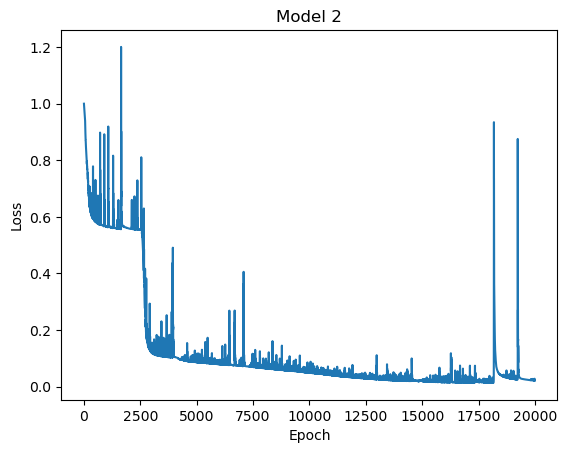

In [32]:
#error vs epoch plot
plt.plot(Model2epoch_array, Model2loss_array)
plt.title('Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

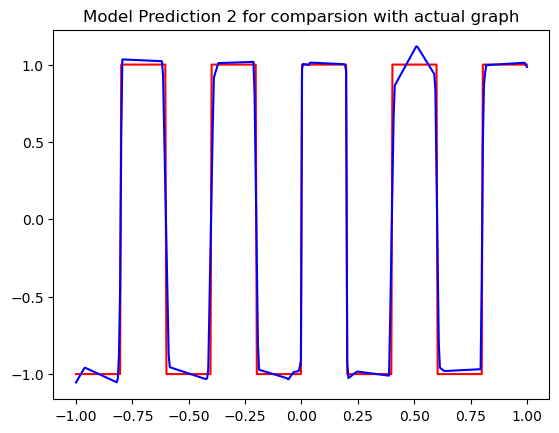

In [34]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()

In [35]:
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)            
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001) 

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3: weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3: weight and bias before training
hiddenlayer.weight 	 tensor([[ 0.4726],
        [-0.7093],
        [-0.0540],
        [-0.4565],
        [ 0.2344],
        [ 0.3343],
        [ 0.4837],
        [-0.5550],
        [-0.7252],
        [-0.4271],
        [ 0.2166],
        [ 0.1345],
        [-0.9676],
        [ 0.8313],
        [-0.8941],
        [ 0.0445],
        [ 0.7197],
        [-0.8491],
        [ 0.7543],
        [-0.5718],
        [-0.9817],
        [ 0.1341],
        [-0.4053],
        [ 0.3928],
        [ 0.7066],
        [-0.1561],
        [-0.9286],
        [ 0.5266],
        [-0.1901],
        [-0.3292],
        [ 0.2238],
        [-0.6701],
        [ 0.1473],
        [ 0.9191],
        [ 0.2124],
        [ 0.0569],
        [ 0.7564],
        [ 0.3686],
        [-0.2096],
        [ 0.0610],
        [ 0.9236],
        [ 0.0821],
        [-0.9377],
        [ 0.7153],
        [ 0.2111],
        [-0.3378],
        [ 0.5295],
        

In [36]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.9267
epoch: 200, loss = 0.8848
epoch: 300, loss = 0.8578
epoch: 400, loss = 0.8368
epoch: 500, loss = 0.8176
epoch: 600, loss = 0.7982
epoch: 700, loss = 0.7776
epoch: 800, loss = 0.7552
epoch: 900, loss = 0.7304
epoch: 1000, loss = 0.7024
epoch: 1100, loss = 0.6709
epoch: 1200, loss = 0.6364
epoch: 1300, loss = 0.5993
epoch: 1400, loss = 0.5602
epoch: 1500, loss = 0.5224
epoch: 1600, loss = 0.4874
epoch: 1700, loss = 0.4563
epoch: 1800, loss = 0.4294
epoch: 1900, loss = 0.4066
epoch: 2000, loss = 0.3873
epoch: 2100, loss = 0.3704
epoch: 2200, loss = 0.3556
epoch: 2300, loss = 0.3424
epoch: 2400, loss = 0.3304
epoch: 2500, loss = 0.3196
epoch: 2600, loss = 0.3098
epoch: 2700, loss = 0.3009
epoch: 2800, loss = 0.2927
epoch: 2900, loss = 0.2852
epoch: 3000, loss = 0.2783
epoch: 3100, loss = 0.2720
epoch: 3200, loss = 0.2662
epoch: 3300, loss = 0.2607
epoch: 3400, loss = 0.2556
epoch: 3500, loss = 0.2510
epoch: 3600, loss = 0.2466
epoch: 3700, loss = 0.2426
epoch: 380

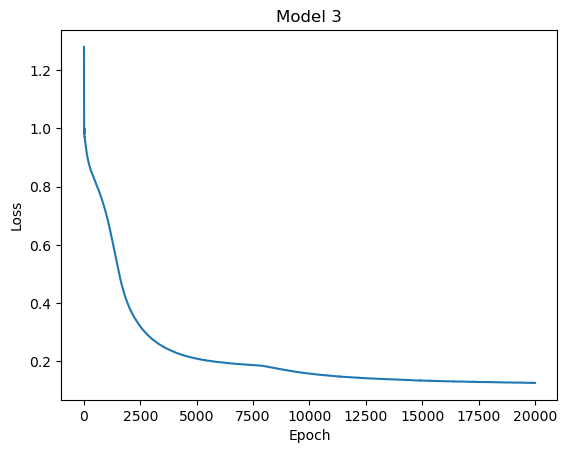

In [37]:
#error vs epoch plot
plt.plot(Model3epoch_array, Model3loss_array)
plt.title('Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

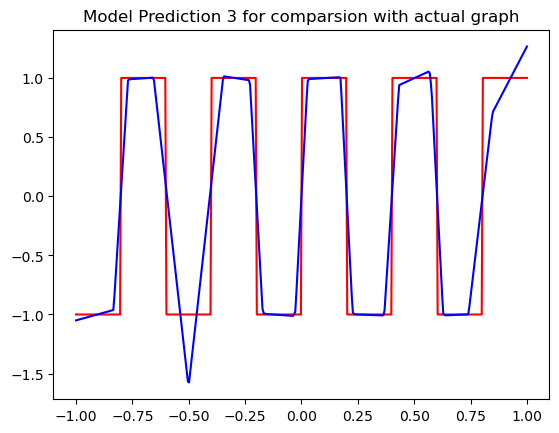

In [38]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

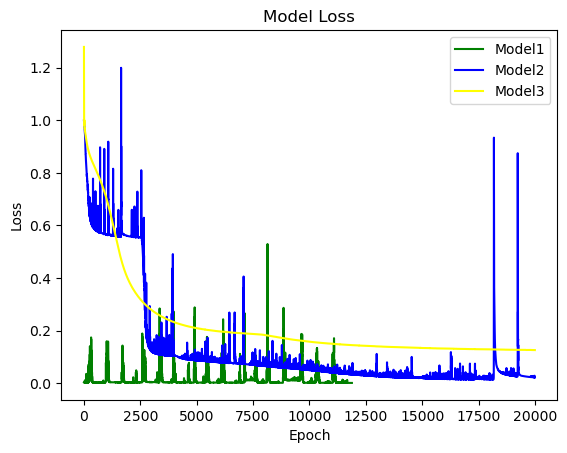

In [39]:
plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "yellow")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch_function2.png')
plt.show()

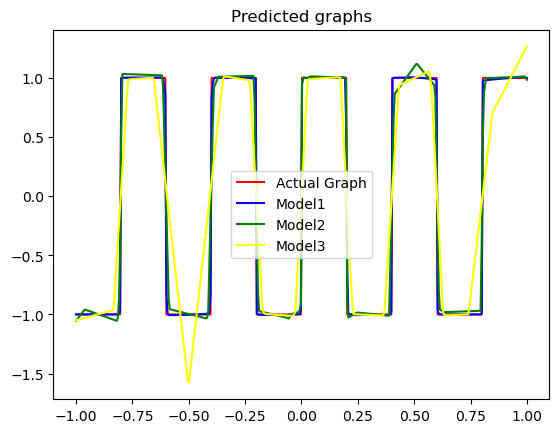

In [41]:
#Plotting the prediction

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graphs
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.plot(x,Model2prediction.data.numpy(),color="green")
plt.plot(x,Model3prediction.data.numpy(),color="yellow")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.savefig('predicted_function2.png')
plt.show()